TOTAL TIME STEP: 220
[-46.57, -45.20576504134671, -43.819555696844866, -42.412363237018724, -40.985210323564964, -39.539155645213455, -38.07525648233613, -36.594563524889736, -35.09813936418023, -33.58708712243155, -32.0625558226419, -30.525716862025153, -28.97774912875415, -27.419828609349047, -25.853130593399626, -24.27880104161052, -22.697944731056463, -21.111633931893866, -19.520939135365957, -17.926940148347278, -16.330697188316833, -14.733288836725993, -13.135820159223663, -11.539375992145425, -9.945018615572959, -8.353799097327087, -6.766677008703242, -5.184518468896409, -3.6082079213360227, -2.0386999621843516, -0.47689018607433625, 1.0764911570642588, 2.6207980912212956, 4.1554474830394295, 5.679949338537949, 7.193927840897898, 8.69701071152703, 10.188781075909178, 11.668847546607786, 13.136967749159135, 14.59303907167472, 16.03692821406292, 17.468461361998816, 18.8873948090758, 20.293562035142998, 21.686950671899684, 23.067632975525658, 24.435733025841532, 25.79127541325308, 

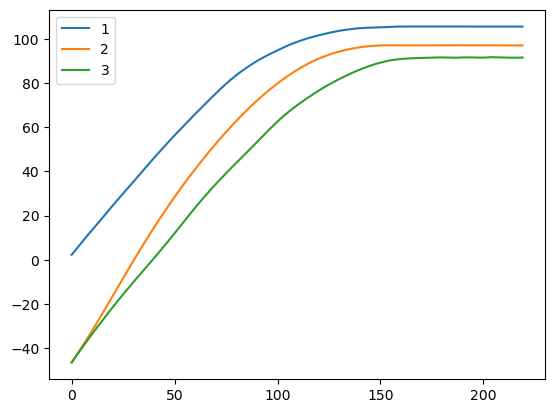

In [11]:
import numpy as np
import IDM
import matplotlib.pyplot as plt

CARS = np.loadtxt("D:\DATA\TIL6022\data.csv", delimiter=",")
test_scenes = []
for i in range(1000):
    test_scenes.append(np.squeeze(CARS[np.where(CARS[:, 0] == i), :], 0))


test_scene = test_scenes[31]

print("TOTAL TIME STEP: %d" %test_scene.shape[0] )


car_front = IDM.Car(4.5, test_scene[:, 1] + 2.25, test_scene[:, 3], test_scene[:, 3])

car_follow = IDM.Car(5, [test_scene[0, 4] + 2.5], [test_scene[0, 5]], [test_scene[0, 6]])

car_follow_real = IDM.Car(5, [test_scene[:, 4] + 2.5], [test_scene[:, 5]], [test_scene[:, 6]])

param = {
    "v0": 40,
    "s0":  4,
    "T": 0.3,
    "a": 3.79,
    "b": 6,
    "sigma": 4
}

idm = IDM.IntelDriverModel(param)

idm.update(car_front, car_follow, 0.1)

print(car_follow.xs)
print(car_front.xs)
print(car_follow_real.xs)


plt.plot(car_front.xs, label="1")
plt.plot(car_follow.xs, label="2")
plt.plot(car_follow_real.xs[0], label="3")
plt.legend()
plt.show()

In [7]:
def single_test(test_scene, param):

    car_front = IDM.Car(4.5, test_scene[:, 1] + 2.25, test_scene[:, 3], test_scene[:, 3])
    car_follow = IDM.Car(5, [test_scene[0, 4] + 2.5], [test_scene[0, 5]], [test_scene[0, 6]])
    car_follow_real = IDM.Car(5, [test_scene[:, 4] + 2.5], [test_scene[:, 5]], [test_scene[:, 6]])

    LENGTH = len(car_front.xs)

    idm = IDM.IntelDriverModel(param)
    idm.update(car_front, car_follow, 0.1)
    return 1 / LENGTH * np.sum(np.square([x1 - x2 for x1, x2 in zip(car_follow_real.xs[0], car_follow.xs)]))

single_test(test_scenes[5], param)

2450.02012450778